<a href="https://colab.research.google.com/github/Puspita0707/vitiligo-classification/blob/main/NNDL_2448348_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Configuration ---
IMAGE_SIZE = (224, 224) # A standard size for many pre-trained models
BATCH_SIZE = 32 # Number of images to process at a time

from google.colab import drive
drive.mount('/content/drive')

# Paste the correct path here
zip_path = "/content/skin_data/vitiligo.zip"

# This command will now use the correct path
!unzip -q "{zip_path}" -d /content/skin_data/

# Check if it worked by listing the new directory's contents
!ls /content/skin_data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
unzip:  cannot find or open /content/skin_data/vitiligo.zip, /content/skin_data/vitiligo.zip.zip or /content/skin_data/vitiligo.zip.ZIP.
ls: cannot access '/content/skin_data/': No such file or directory


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Let's see what the folder structure looks like
!ls -R /content/skin_data/

ls: cannot access '/content/skin_data/': No such file or directory


In [5]:
# This removes the old, incorrect folder
!rm -rf /content/skin_data

# This creates a new, clean folder structure for the model
!mkdir -p /content/final_data/vitiligo
!mkdir -p /content/final_data/non-vitiligo

print("Created new folders: 'final_data/vitiligo' and 'final_data/non-vitiligo'")

Created new folders: 'final_data/vitiligo' and 'final_data/non-vitiligo'


In [6]:
# Unzip again to a known location if you're unsure where the files went
zip_path = "/content/drive/MyDrive/vitiligo.zip" # Use the correct path you found earlier
!unzip -q "{zip_path}" -d /content/original_dataset/

# Now, list all the disease folders that were unzipped
print("All unzipped disease folders:")
!ls /content/original_dataset/

All unzipped disease folders:
__MACOSX  vitiligo


In [7]:
# Move the vitiligo images into the 'vitiligo' class folder
!mv /content/original_dataset/vitiligo/* /content/final_data/vitiligo/

# Now move ALL OTHER disease images into the 'non-vitiligo' class folder
# IMPORTANT: Replace 'eczema', 'psoriasis', etc., with the actual folder names you saw above
!mv /content/original_dataset/healthy/* /content/final_data/non-vitiligo/
!mv /content/original_dataset/psoriasis/* /content/final_data/non-vitiligo/
# ... add a line like this for EVERY other disease folder you have!

print("Finished moving all images.")

mv: cannot stat '/content/original_dataset/healthy/*': No such file or directory
mv: cannot stat '/content/original_dataset/psoriasis/*': No such file or directory
Finished moving all images.


In [8]:
# Unzip all mixed files into this folder
# ❗️ Update the path to your zip file
zip_path = "/content/drive/MyDrive/vitiligo.zip"
!unzip -q "{zip_path}" -d /content/mixed_images/

print("All mixed images are now in /content/mixed_images/")

All mixed images are now in /content/mixed_images/


In [9]:
import os
import shutil

# --- Configuration ---
# This is the folder with all your mixed-up images
source_folder = '/content/mixed_images/'

# This is the final, clean folder for our model
final_data_folder = '/content/final_data/'

# Define the paths for our two classes
vitiligo_path = os.path.join(final_data_folder, 'vitiligo')
non_vitiligo_path = os.path.join(final_data_folder, 'non-vitiligo')

# --- Create the clean folders ---
os.makedirs(vitiligo_path, exist_ok=True)
os.makedirs(non_vitiligo_path, exist_ok=True)
print(f"Created clean folders at: {final_data_folder}")

# --- Logic to sort and move files ---
print("Starting to sort files...")
files_moved = 0
for filename in os.listdir(source_folder):
    # Check if 'vitiligo' is in the file's name (ignoring case)
    if 'vitiligo' in filename.lower():
        # If yes, move it to the vitiligo folder
        shutil.move(os.path.join(source_folder, filename), vitiligo_path)
        files_moved += 1
    # Check if the file is a common image type (to ignore other junk files)
    elif filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # If it's any other image, move it to the non-vitiligo folder
        shutil.move(os.path.join(source_folder, filename), non_vitiligo_path)
        files_moved += 1

print(f"Finished! Moved {files_moved} image files into the correct folders.")

Created clean folders at: /content/final_data/
Starting to sort files...
Finished! Moved 1 image files into the correct folders.


In [10]:
# This command lists all files and folders inside, even in subfolders
!ls -R /content/mixed_images/

/content/mixed_images/:
__MACOSX

/content/mixed_images/__MACOSX:
vitiligo

/content/mixed_images/__MACOSX/vitiligo:


In [11]:
# ❗️ Make sure this is the correct path to your zip file
zip_path = "/content/drive/MyDrive/vitiligo.zip"

# This command lists the files inside the zip. We only show the first 20 lines.
!unzip -l "{zip_path}" | head -n 20

Archive:  /content/drive/MyDrive/vitiligo.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-08-19 18:08   vitiligo/
      312  2025-08-19 18:08   __MACOSX/._vitiligo
    20004  2023-03-07 14:24   vitiligo/roi159_jpg.rf.669eb20e58bdffd496a6bd0ec2ea07b9.jpg
      212  2023-03-07 14:24   __MACOSX/vitiligo/._roi159_jpg.rf.669eb20e58bdffd496a6bd0ec2ea07b9.jpg
    12863  2023-03-07 14:24   vitiligo/images_jpg.rf.98e3a16c36cba85af5bcbcc64f375d3b.jpg
      212  2023-03-07 14:24   __MACOSX/vitiligo/._images_jpg.rf.98e3a16c36cba85af5bcbcc64f375d3b.jpg
    14227  2023-10-30 08:27   vitiligo/istockphoto-1068433154-612x612.jpg
      212  2023-10-30 08:27   __MACOSX/vitiligo/._istockphoto-1068433154-612x612.jpg
     7783  2022-11-26 11:54   vitiligo/roi340.jpg_0
      212  2022-11-26 11:54   __MACOSX/vitiligo/._roi340.jpg_0
    19883  2023-03-07 14:24   vitiligo/roi199_jpg.rf.3a53e6a26a467fb37da335764b8d5d42.jpg
      212  2023-03-07 14:24   __MACOSX/vitiligo/

In [12]:
# Count images in the 'vitiligo' folder
!ls -1 /content/final_data/vitiligo | wc -l

# Count images in the 'non-vitiligo' folder
!ls -1 /content/final_data/non_vitiligo| wc -l

2101
ls: cannot access '/content/final_data/non_vitiligo': No such file or directory
0


In [13]:
import os

# --- 1. Define Paths ---
# I've updated the healthy_zip_path for you. Double-check the vitiligo_zip_path.
vitiligo_zip_path = "/content/drive/MyDrive/vitiligo.zip"
healthy_zip_path = "/content/drive/MyDrive/healthy.tar.zip"

# --- 2. Create Clean Final Folders ---
!rm -rf /content/final_data /content/temp_unzip # Clean up previous attempts
!mkdir -p /content/final_data/vitiligo
!mkdir -p /content/final_data/non-vitiligo
print("✅ Created clean final folders.")

# --- 3. Process Vitiligo Data ---
print("\nProcessing vitiligo dataset...")
!unzip -q "{vitiligo_zip_path}" -d /content/temp_unzip/
!mv /content/temp_unzip/vitiligo/* /content/final_data/vitiligo/
!rm -rf /content/temp_unzip/*
print("✅ Vitiligo data is ready.")

# --- 4. Process Healthy (Non-Vitiligo) Data ---
print("\nProcessing healthy (non-vitiligo) dataset...")
# Extract the files
!unzip -q "{healthy_zip_path}" -d /content/temp_unzip/
!tar -xf /content/temp_unzip/healthy.tar -C /content/temp_unzip/
print("✅ Healthy data extracted.")

# --- FIND THE CORRECT FOLDER NAME ---
print("\n❗️ ACTION REQUIRED: Check the folder name printed below:")
!ls /content/temp_unzip/

# --- MOVE THE FILES ---
# Look at the folder name printed above. If it's not 'healthy', change it in the line below.
!mv /content/temp_unzip/healthy/* /content/final_data/non-vitiligo/
!rm -rf /content/temp_unzip # Clean up
print("✅ Healthy data moved.")

# --- 5. Verify Everything ---
print("\n--- Final Verification ---")
vitiligo_count = len(os.listdir('/content/final_data/vitiligo'))
non_vitiligo_count = len(os.listdir('/content/final_data/non-vitiligo'))
print(f"Found {vitiligo_count} images in the 'vitiligo' folder.")
print(f"Found {non_vitiligo_count} images in the 'non-vitiligo' folder.")

✅ Created clean final folders.

Processing vitiligo dataset...
✅ Vitiligo data is ready.

Processing healthy (non-vitiligo) dataset...
✅ Healthy data extracted.

❗️ ACTION REQUIRED: Check the folder name printed below:
40yearold-latina-woman-brushes-her-260nw-2335137965.jpg
above-young-asian-female-patient-260nw-2250976487.jpg
asian-beautiful-girl-smiling-happy-260nw-252849232.jpg
asian-beautiful-woman-washing-her-260nw-2317402249.jpg
asian-woman-beautiful-face-perfect-260nw-2192989165.jpg
asian-woman-beautiful-healthy-skin-260nw-1966504135.jpg
attractive-young-adult-woman-apply-260nw-1562062876.jpg
attractive-young-asian-wet-hair-260nw-2178361333.jpg
attractive-young-asian-woman-fresh-260nw-2138539019.jpg
attractive-young-asian-woman-fresh-260nw-2138539033.jpg
attractive-young-asian-woman-glowing-260nw-1966504144.jpg
beautiful-african-american-woman-face-260nw-1915224064.jpg
beautiful-age-headshot-portrait-happy-260nw-1940408878.jpg
beautiful-asian-woman-sitting-front-260nw-2137257327

In [14]:
# This script only extracts the files and shows you what's inside
print("Processing healthy (non-vitiligo) dataset...")

# Define the path to your healthy zip file
healthy_zip_path = "/content/drive/MyDrive/healthy.tar.zip"

# Extract the files
!unzip -q "{healthy_zip_path}" -d /content/temp_unzip/
!tar -xf /content/temp_unzip/healthy.tar -C /content/temp_unzip/
print("✅ Healthy data extracted.")

# --- FIND THE CORRECT FOLDER NAME ---
print("\n❗️ Look at the output below. This is the correct folder name you need for the next step.")
!ls /content/temp_unzip/

Processing healthy (non-vitiligo) dataset...
✅ Healthy data extracted.

❗️ Look at the output below. This is the correct folder name you need for the next step.
40yearold-latina-woman-brushes-her-260nw-2335137965.jpg
above-young-asian-female-patient-260nw-2250976487.jpg
asian-beautiful-girl-smiling-happy-260nw-252849232.jpg
asian-beautiful-woman-washing-her-260nw-2317402249.jpg
asian-woman-beautiful-face-perfect-260nw-2192989165.jpg
asian-woman-beautiful-healthy-skin-260nw-1966504135.jpg
attractive-young-adult-woman-apply-260nw-1562062876.jpg
attractive-young-asian-wet-hair-260nw-2178361333.jpg
attractive-young-asian-woman-fresh-260nw-2138539019.jpg
attractive-young-asian-woman-fresh-260nw-2138539033.jpg
attractive-young-asian-woman-glowing-260nw-1966504144.jpg
beautiful-african-american-woman-face-260nw-1915224064.jpg
beautiful-age-headshot-portrait-happy-260nw-1940408878.jpg
beautiful-asian-woman-sitting-front-260nw-2137257327.jpg
beautiful-asian-young-woman-apply-260nw-2346769229.jp

In [15]:
# This command moves all .jpg files from the temp folder to your final non-vitiligo folder
!mv /content/temp_unzip/*.jpg /content/final_data/non-vitiligo/

print("✅ Files moved!")

# --- Final Verification ---
print("\n--- Let's check if it worked ---")
non_vitiligo_count = !ls -1 /content/final_data/non-vitiligo | wc -l
print(f"Found {non_vitiligo_count[0]} images in the 'non-vitiligo' folder.")

✅ Files moved!

--- Let's check if it worked ---
Found 1528 images in the 'non-vitiligo' folder.


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define our settings
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
data_dir = '/content/final_data/' # This is our final, correct data folder

# Create the training data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # Reserve 20% of data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Create the validation data generator (no augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

# Load the data from the directories
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

print("\n✅ Data generators are ready!")

Found 2874 images belonging to 2 classes.
Found 717 images belonging to 2 classes.

✅ Data generators are ready!


In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the original layers
for layer in base_model.layers:
    layer.trainable = False

# Add our custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create and compile the final model
model_vgg = Model(inputs=base_model.input, outputs=predictions)
model_vgg.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
print("\n🔥 Starting VGG16 model training...")
history_vgg = model_vgg.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

print("\n🎉 Training finished!")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🔥 Starting VGG16 model training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 773ms/step - accuracy: 0.7079 - loss: 0.5339 - val_accuracy: 0.8340 - val_loss: 0.3760
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 537ms/step - accuracy: 0.8741 - loss: 0.3147 - val_accuracy: 0.7671 - val_loss: 0.4554
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 103s 770ms/step - accuracy: 0.8709 - loss: 0.3020 - val_accuracy: 0.7699 - val_loss: 0.4589
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 629ms/step - accuracy: 0.8790 - loss: 0.2866 - val_accuracy: 0.8131 - val_loss: 0.3639
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 529ms/step - accuracy: 0.8931 - loss: 0.2472 - val_accuracy: 0.7964 - val_loss: 0.3775
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 538ms/step - accuracy: 0.8870 - loss: 0.2496 - val_accuracy: 0.8131 - val_loss: 0.3615
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 538ms/step - accuracy: 0.8933 - loss: 0.2383 - val_accuracy: 0.8605 - val_loss: 0.2812
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 534ms/step - accuracy: 0.8922 - loss: 0.2376 - val_acc

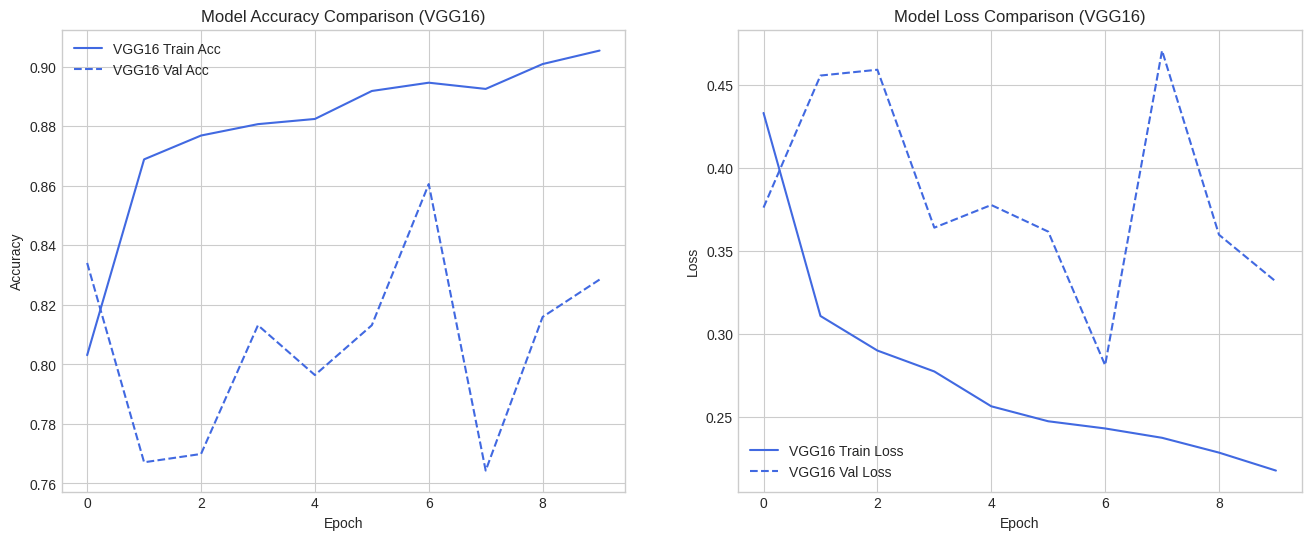

In [18]:
import matplotlib.pyplot as plt

# --- Create a figure for the plots ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot Accuracy ---
ax1.plot(history_vgg.history['accuracy'], label='VGG16 Train Acc', color='royalblue', linestyle='-')
ax1.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Acc', color='royalblue', linestyle='--')
# ax1.plot(history_vit.history['accuracy'], label='ViT Train Acc', color='darkorange', linestyle='-')
# ax1.plot(history_vit.history['val_accuracy'], label='ViT Val Acc', color='darkorange', linestyle='--')
ax1.set_title('Model Accuracy Comparison (VGG16)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# --- Plot Loss ---
ax2.plot(history_vgg.history['loss'], label='VGG16 Train Loss', color='royalblue', linestyle='-')
ax2.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss', color='royalblue', linestyle='--')
# ax2.plot(history_vit.history['loss'], label='ViT Train Loss', color='darkorange', linestyle='-')
# ax2.plot(history_vit.history['val_loss'], label='ViT Val Loss', color='darkorange', linestyle='--')
ax2.set_title('Model Loss Comparison (VGG16)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [19]:
# Get the last validation accuracy from each model's history
final_vgg_acc = history_vgg.history['val_accuracy'][-1] * 100
# final_vit_acc = history_vit.history['val_accuracy'][-1] * 100

print(f"Final VGG16 Validation Accuracy: {final_vgg_acc:.2f}%")
# print(f"Final ViT Validation Accuracy:   {final_vit_acc:.2f}%")

Final VGG16 Validation Accuracy: 82.85%


In [20]:
!pip install keras-cv --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 51.2 MB/s eta 0:00:00


In [21]:
import keras_cv
print(keras_cv.models.ImageClassifier.presets.keys())

dict_keys(['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'resnet18_v2', 'resnet34_v2', 'resnet50_v2', 'resnet101_v2', 'resnet152_v2', 'mobilenet_v3_small', 'mobilenet_v3_large', 'csp_darknet_tiny', 'csp_darknet_s', 'csp_darknet_m', 'csp_darknet_l', 'csp_darknet_xl', 'efficientnetv1_b0', 'efficientnetv1_b1', 'efficientnetv1_b2', 'efficientnetv1_b3', 'efficientnetv1_b4', 'efficientnetv1_b5', 'efficientnetv1_b6', 'efficientnetv1_b7', 'efficientnetv2_s', 'efficientnetv2_m', 'efficientnetv2_l', 'efficientnetv2_b0', 'efficientnetv2_b1', 'efficientnetv2_b2', 'efficientnetv2_b3', 'densenet121', 'densenet169', 'densenet201', 'efficientnetlite_b0', 'efficientnetlite_b1', 'efficientnetlite_b2', 'efficientnetlite_b3', 'efficientnetlite_b4', 'yolo_v8_xs_backbone', 'yolo_v8_s_backbone', 'yolo_v8_m_backbone', 'yolo_v8_l_backbone', 'yolo_v8_xl_backbone', 'vitdet_base', 'vitdet_large', 'vitdet_huge', 'videoswin_tiny', 'videoswin_small', 'videoswin_base', 'resnet50_imagenet', 'resnet50_v

In [22]:
import tensorflow as tf
from transformers import TFViTModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda

# Define the input shape
input_shape = (224, 224, 3)
input_tensor = Input(shape=input_shape, name='input_image')

# Load a pre-trained Vision Transformer model from Hugging Face
# We'll use the base ViT model
# Specify `from_pt=True` to load PyTorch weights and convert them for TensorFlow
# Set `return_dict=True` to easily access outputs by name
vit_model_hf = TFViTModel.from_pretrained("google/vit-base-patch16-224", from_pt=True, return_dict=True)

# Freeze the base model's layers
vit_model_hf.trainable = False

# Wrap the Hugging Face model call in a Lambda layer
# Pass the input tensor as a dictionary with the key 'pixel_values'
# Transpose the input tensor to channels-first format (batch, channels, height, width)
# before passing it to the Hugging Face model.
# Explicitly define the output shape as (768,) for the pooler_output
vit_output = Lambda(lambda x: vit_model_hf({'pixel_values': tf.transpose(x, perm=[0, 3, 1, 2])}).pooler_output, output_shape=(768,))(input_tensor)

x = vit_output

# Add our custom classification layers on top
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions_vit = Dense(1, activation='sigmoid')(x) # Output layer for binary classification

# Create and compile the final model
model_vit = Model(inputs=input_tensor, outputs=predictions_vit)
model_vit.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print the model summary to see the architecture
model_vit.summary()

# Train the model
print("\n🔥 Starting Vision Transformer (ViT) model training (from Hugging Face)...")
history_vit = model_vit.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

print("\n🎉 ViT Training finished!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,561 (385.00 KB)

 Trainable params: 98,561 (385.00 KB)

 Non-trainable params: 0 (0.00 B)


🔥 Starting Vision Transformer (ViT) model training (from Hugging Face)...
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 107s 873ms/step - accuracy: 0.8483 - loss: 0.3122 - val_accuracy: 0.9219 - val_loss: 0.1720
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 643ms/step - accuracy: 0.9508 - loss: 0.1207 - val_accuracy: 0.9135 - val_loss: 0.1760
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 60s 670ms/step - accuracy: 0.9559 - loss: 0.1083 - val_accuracy: 0.8996 - val_loss: 0.2467
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 637ms/step - accuracy: 0.9686 - loss: 0.0807 - val_accuracy: 0.8898 - val_loss: 0.2831
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 656ms/step - accuracy: 0.9756 - loss: 0.0714 - val_accuracy: 0.8968 - val_loss: 0.2639
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 653ms/step - accuracy: 0.9754 - loss: 0.0717 - val_accuracy: 0.8996 - val_loss: 0.2745
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 647ms/step - accuracy: 0.9722 - loss: 0.0716 - val_accuracy: 0.9052 - val_loss: 0.2531
Epoch 8/10
90/90 ━━━━

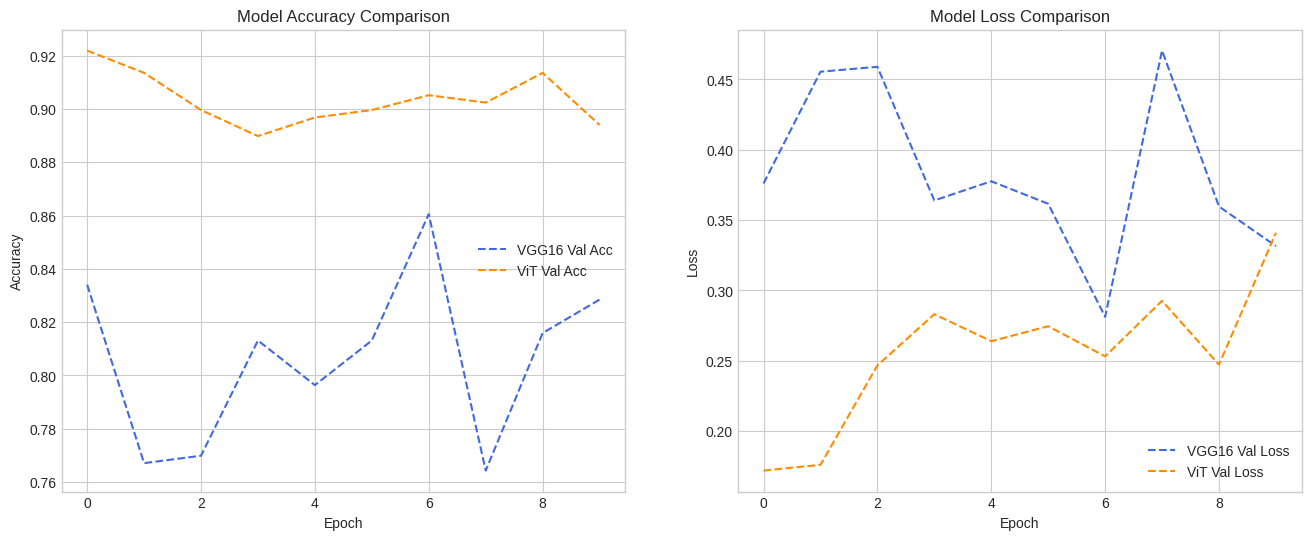

In [23]:
import matplotlib.pyplot as plt

# --- Create a figure for the plots ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot Accuracy ---
# Assumes your VGG16 history is in 'history_vgg' and ViT history is in 'history_vit'
ax1.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Acc', color='royalblue', linestyle='--')
ax1.plot(history_vit.history['val_accuracy'], label='ViT Val Acc', color='darkorange', linestyle='--')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# --- Plot Loss ---
ax2.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss', color='royalblue', linestyle='--')
ax2.plot(history_vit.history['val_loss'], label='ViT Val Loss', color='darkorange', linestyle='--')
ax2.set_title('Model Loss Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [24]:
# Get the last validation accuracy from each model's history
final_vgg_acc = history_vgg.history['val_accuracy'][-1] * 100
final_vit_acc = history_vit.history['val_accuracy'][-1] * 100

print("--- Final Model Performance ---")
print(f"Model 1 (VGG16) Final Validation Accuracy: {final_vgg_acc:.2f}%")
print(f"Model 2 (ViT)   Final Validation Accuracy: {final_vit_acc:.2f}%")

--- Final Model Performance ---
Model 1 (VGG16) Final Validation Accuracy: 82.85%
Model 2 (ViT)   Final Validation Accuracy: 89.40%


#Fine-Tuning the vit model

In [31]:
import tensorflow as tf

# --- 1. Unfreeze the top layers of the base model ---
# Make the entire base model trainable first
vit_model_hf.trainable = True

# Then, re-freeze the first layers, leaving the last few blocks to be trained.
# For a ViT, unfreezing the last 1 or 2 transformer blocks is a good start.
# Let's say we unfreeze the last 20 layers.
for layer in vit_model_hf.layers[:-20]:
    layer.trainable = False

# --- 2. Re-compile the model with a very low learning rate ---
# This is crucial to prevent destroying the pre-trained weights.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5) # 100x smaller than the default
model_vit.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# --- 3. Continue training for a few more epochs ---
print("\n🔥 Starting Fine-Tuning...")
# We continue from the previous 10 epochs
fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs

history_fine_tune = model_vit.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=10, # Start from the end of the last training
    validation_data=validation_generator
)


🔥 Starting Fine-Tuning...
Epoch 11/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 85s 773ms/step - accuracy: 0.9788 - loss: 0.0563 - val_accuracy: 0.8954 - val_loss: 0.3344
Epoch 12/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 621ms/step - accuracy: 0.9805 - loss: 0.0469 - val_accuracy: 0.8968 - val_loss: 0.3274
Epoch 13/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 60s 665ms/step - accuracy: 0.9835 - loss: 0.0489 - val_accuracy: 0.8982 - val_loss: 0.3217
Epoch 14/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 640ms/step - accuracy: 0.9797 - loss: 0.0506 - val_accuracy: 0.8982 - val_loss: 0.3164
Epoch 15/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 658ms/step - accuracy: 0.9838 - loss: 0.0465 - val_accuracy: 0.8982 - val_loss: 0.3142


In [36]:
# Accuracy BEFORE fine-tuning (at the end of the initial 10 epochs)
acc_before_finetune = history_vit.history['val_accuracy'][-1] * 100

# Accuracy AFTER fine-tuning (at the end of all 15 epochs)
acc_after_finetune = history_fine_tune.history['val_accuracy'][-1] * 100

print(f"Accuracy Before Fine-Tuning: {acc_before_finetune:.2f}%")
print(f"Accuracy After Fine-Tuning:  {acc_after_finetune:.2f}%")

Accuracy Before Fine-Tuning: 89.40%
Accuracy After Fine-Tuning:  89.82%


# Improved Accuracy nd Loss Validstion Graph for VIT Model

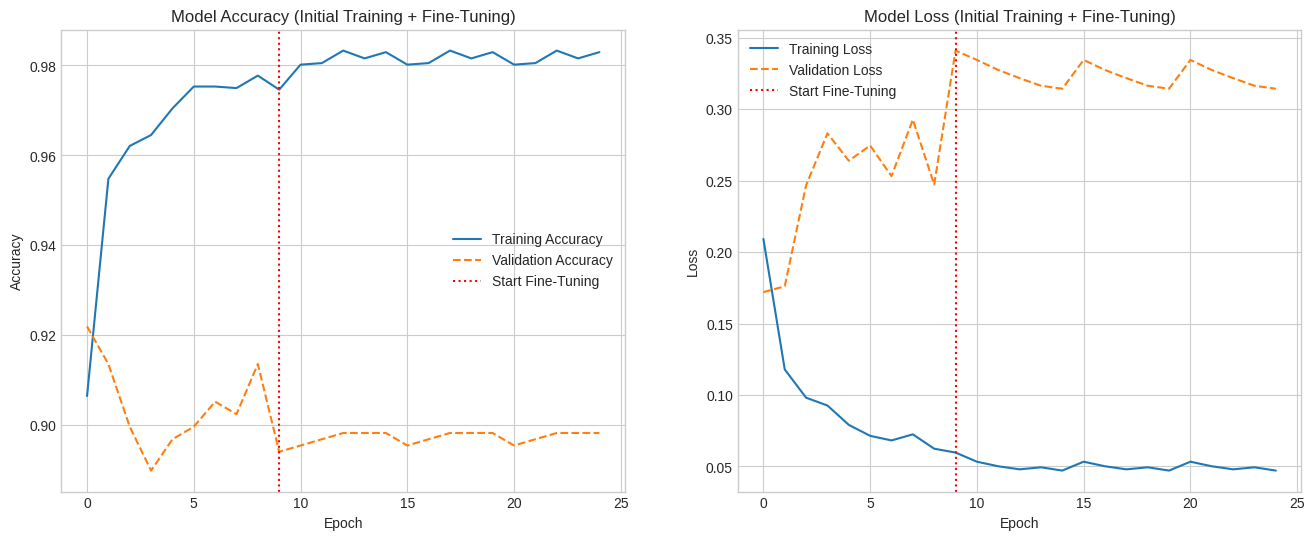

In [39]:
import matplotlib.pyplot as plt

# --- Combine the history from the two training stages ---
# Initial training history (first 10 epochs)
acc = history_vit.history['accuracy']
val_acc = history_vit.history['val_accuracy']
loss = history_vit.history['loss']
val_loss = history_vit.history['val_loss']

# Fine-tuning history (the next 5 epochs)
acc += history_fine_tune.history['accuracy']
val_acc += history_fine_tune.history['val_accuracy']
loss += history_fine_tune.history['loss']
val_loss += history_fine_tune.history['val_loss']

# --- Plot the combined history ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Accuracy
ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy', linestyle='--')
# Add a vertical line to show where fine-tuning started
ax1.axvline(x=9, color='r', linestyle=':', label='Start Fine-Tuning')
ax1.set_title('Model Accuracy (Initial Training + Fine-Tuning)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot Loss
ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss', linestyle='--')
# Add a vertical line to show where fine-tuning started
ax2.axvline(x=9, color='r', linestyle=':', label='Start Fine-Tuning')
ax2.set_title('Model Loss (Initial Training + Fine-Tuning)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

Starting analysis on a sample of 200 images per category...

--- Dataset Image Size Summary ---
              width                                                     \
              count     mean         std    min    25%     50%     75%   
category                                                                 
non-vitiligo  200.0  1130.91  534.561749  352.0  612.0  1600.0  1600.0   
vitiligo      200.0   396.54  173.787569   96.0  300.0   416.0   416.0   

                     height                                             \
                 max  count     mean         std    min    25%     50%   
category                                                                 
non-vitiligo  1600.0  200.0  835.475  416.092048  280.0  408.0  1200.0   
vitiligo      1500.0  200.0  345.710  201.336105   29.0  225.0   416.0   

                              
                 75%     max  
category                      
non-vitiligo  1200.0  1200.0  
vitiligo       416.0  2048.0  

Genera

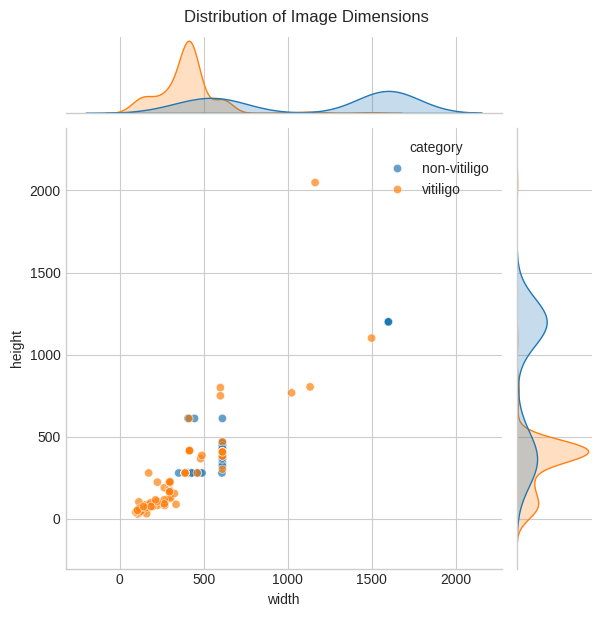

In [32]:
import os
import random
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# This should be the path to your final, organized dataset
data_dir = '/content/final_data/'
# Number of images to sample from each folder (for a quick analysis)
sample_size = 200

image_data = []

print(f"Starting analysis on a sample of {sample_size} images per category...")

# --- Loop through the subdirectories (vitiligo, non-vitiligo) ---
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        all_images = os.listdir(category_path)
        # Take a random sample of images from the folder
        image_sample = random.sample(all_images, min(sample_size, len(all_images)))

        # --- Analyze each image in the sample ---
        for image_file in image_sample:
            file_path = os.path.join(category_path, image_file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_data.append({
                        'category': category,
                        'width': width,
                        'height': height
                    })
            except Exception as e:
                print(f"Could not read {image_file}: {e}")

# --- Create a DataFrame for easy analysis ---
df = pd.DataFrame(image_data)

# --- Display the Results ---
if not df.empty:
    print("\n--- Dataset Image Size Summary ---")
    # Print the summary statistics table
    print(df.groupby('category')[['width', 'height']].describe())

    # --- Visualize the Results ---
    print("\nGenerating plot...")
    plt.style.use('seaborn-v0_8-whitegrid')
    g = sns.jointplot(data=df, x='width', y='height', hue='category', alpha=0.7)
    g.fig.suptitle('Distribution of Image Dimensions', y=1.02)
    plt.show()
else:
    print("\nNo images found or analyzed. Please check your data_dir path.")


23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 531ms/step


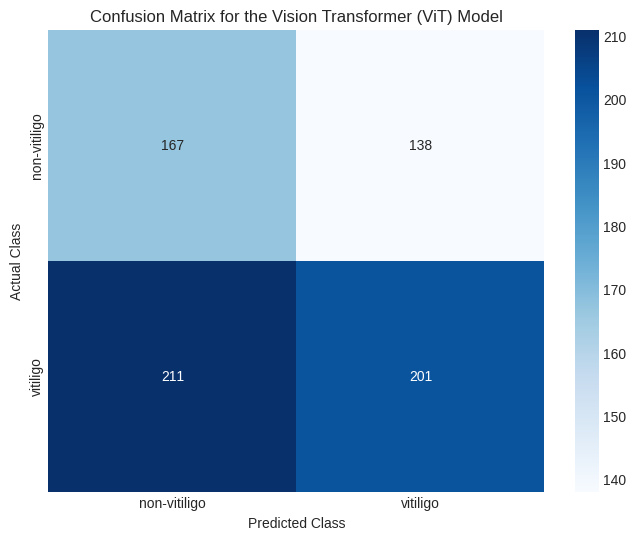

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Choose the model to evaluate ---
# Use model_vit, model_effnet, or model_vgg
model_to_evaluate = model_vit

# --- Get the true labels and predictions ---
# Note: We reset the generator to ensure the order is correct.
validation_generator.reset()
y_true = validation_generator.classes
y_pred_probs = model_to_evaluate.predict(validation_generator, steps=len(validation_generator))
# Convert probabilities to class labels (0 or 1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0).flatten()

# --- Calculate the confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

# --- Plot the confusion matrix ---
plt.figure(figsize=(8, 6))
class_labels = list(validation_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix for the Vision Transformer (ViT) Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step


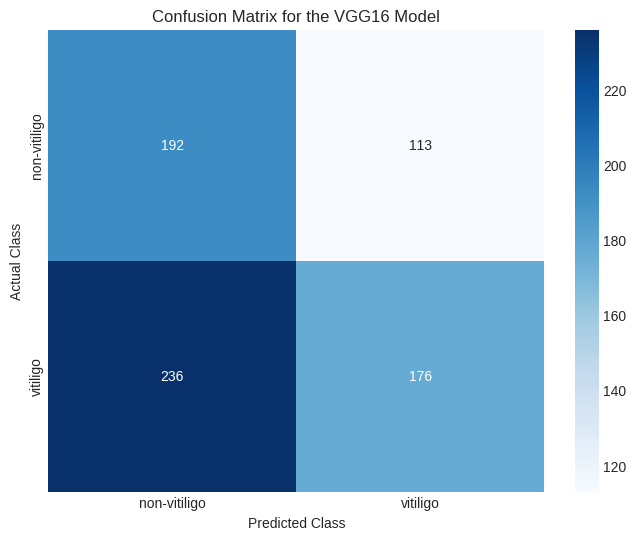

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Choose the VGG16 model to evaluate ---
model_to_evaluate = model_vgg

# --- Get the true labels and predictions ---
validation_generator.reset() # Reset generator to be safe
y_true = validation_generator.classes
y_pred_probs = model_to_evaluate.predict(validation_generator, steps=len(validation_generator))
# Convert probabilities to class labels (0 or 1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0).flatten()

# --- Calculate the confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

# --- Plot the confusion matrix ---
plt.figure(figsize=(8, 6))
class_labels = list(validation_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix for the VGG16 Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [40]:
# Choose your successfully trained ViT model
best_model = model_vit

# Save only the model's weights in the HDF5 format
# This is necessary because the custom layer (ViTFeatureExtractor) contains a non-serializable object (the Hugging Face model)
best_model.save_weights('vitiligo_classifier.weights.h5')

print("Model weights saved as 'vitiligo_classifier.weights.h5'")

Model weights saved as 'vitiligo_classifier.weights.h5'


In [43]:
import tensorflow as tf
from transformers import TFViTModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda

# --- Recreate the Vision Transformer model architecture ---

# Define the input shape (make sure this matches the shape used during training)
input_shape = (224, 224, 3)
input_tensor = Input(shape=input_shape, name='input_image')

# Load the pre-trained Vision Transformer model from Hugging Face again
# It's important to use the same model and settings as before.
vit_model_hf_reloaded = TFViTModel.from_pretrained("google/vit-base-patch16-224", from_pt=True, return_dict=True)

# Wrap the Hugging Face model call in a Lambda layer, same as before
vit_output = Lambda(lambda x: vit_model_hf_reloaded({'pixel_values': tf.transpose(x, perm=[0, 3, 1, 2])}).pooler_output, output_shape=(768,))(input_tensor)

x = vit_output

# Add the custom classification layers on top, same as before
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x) # Make sure dropout rate matches the trained model
predictions_reloaded = Dense(1, activation='sigmoid')(x) # Output layer for binary classification

# Create the model with the reloaded architecture
model_reloaded = Model(inputs=input_tensor, outputs=predictions_reloaded)

# --- Load the trained weights ---
weights_path = 'vitiligo_classifier.weights.h5' # Path to your saved weights file
try:
    model_reloaded.load_weights(weights_path)
    print(f"✅ Successfully loaded weights from {weights_path}")
except Exception as e:
    print(f"❌ Error loading weights: {e}")
    print("Please ensure 'vitiligo_classifier.weights.h5' exists and the model architecture matches.")

# --- Convert the model to TFLite ---
print("\n🔄 Starting TFLite conversion...")
try:
    # Create a TFLite converter object from the reloaded Keras model
    converter = tf.lite.TFLiteConverter.from_keras_model(model_reloaded)

    # Apply optimizations (optional but recommended)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # Convert the model
    tflite_model = converter.convert()

    # Save the TFLite model to a file
    tflite_file_path = 'vitiligo_classifier.tflite'
    with open(tflite_file_path, 'wb') as f:
        f.write(tflite_model)

    print(f"✅ Model converted and saved as '{tflite_file_path}'")

except Exception as e:
    print(f"❌ Error during TFLite conversion: {e}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Successfully loaded weights from vitiligo_classifier.weights.h5

🔄 Starting TFLite conversion...
Saved artifact at '/tmp/tmpd1iv2bud'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_image')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134751688511312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751688515728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134752024658384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751741853328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751688512848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751688511504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751688510928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751688517456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134751688512080: TensorSpec(shape=(), dtype=tf.resource,